In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from annomalydetector.core import detect_anomalies_with_lstm_autoencoder, detect_anomalies_with_moving_avg_std_2d

In [3]:
df = pd.read_csv('../data/pose/data/red_0712_0016/position_data.csv')
df.head()

,frame,NOSE_x,NOSE_y,LEFT_EYE_x,LEFT_EYE_y,RIGHT_EYE_x,RIGHT_EYE_y,LEFT_EAR_x,LEFT_EAR_y,RIGHT_EAR_x,RIGHT_EAR_y,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,RIGHT_WRIST_x,RIGHT_WRIST_y,LEFT_HIP_x,LEFT_HIP_y,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
0,1.0,0.525896,0.481060,0.533007,0.476425,0.520267,0.476250,0.549978,0.473106,0.514237,0.473486,0.574621,0.490921,0.508924,0.492315,0.565651,0.525961,0.519313,0.528249,0.550516,0.562890,0.537876,0.564187,0.570264,0.545634,0.517687,0.545264,0.586227,0.605650,0.494826,0.604416,0.600308,0.660938,0.474044,0.660994
1,2.0,0.526112,0.481253,0.533294,0.476504,0.520324,0.476309,0.550234,0.472901,0.514087,0.473230,0.574690,0.490460,0.508386,0.491814,0.565407,0.525673,0.518882,0.527435,0.550531,0.562624,0.538058,0.563823,0.569624,0.543918,0.516669,0.543678,0.586075,0.604220,0.493446,0.603968,0.599726,0.659370,0.474218,0.660525
2,3.0,0.528718,0.481789,0.535814,0.476960,0.522186,0.476923,0.551112,0.472861,0.514215,0.473469,0.574298,0.490493,0.507566,0.492131,0.565561,0.525533,0.519138,0.527878,0.550223,0.562646,0.538177,0.563889,0.569863,0.545131,0.516825,0.544978,0.585712,0.605053,0.493604,0.604372,0.599659,0.659941,0.474338,0.660232
3,4.0,0.527719,0.482043,0.535006,0.477198,0.521416,0.477034,0.550825,0.472898,0.513844,0.473216,0.574231,0.490183,0.507561,0.491554,0.564835,0.525836,0.519638,0.527859,0.549039,0.562611,0.537384,0.563772,0.570423,0.543756,0.517343,0.543495,0.585746,0.604340,0.494227,0.603521,0.599861,0.659887,0.474178,0.660410
4,5.0,0.529105,0.481354,0.536542,0.476461,0.522361,0.476353,0.551760,0.472708,0.513761,0.473082,0.573349,0.490495,0.507301,0.491712,0.563395,0.525755,0.519150,0.527227,0.549091,0.562397,0.538259,0.563136,0.570029,0.543454,0.517551,0.543261,0.584844,0.603028,0.494418,0.602611,0.599403,0.659056,0.474290,0.659381


In [4]:
part_name = 'RIGHT_KNEE'
anomaly_indices = detect_anomalies_with_lstm_autoencoder(df, part_name, verbose=True)

Epoch [20/200], Loss: 0.3624
Epoch [40/200], Loss: 0.1988
Epoch [60/200], Loss: 0.0517
Epoch [80/200], Loss: 0.0278
Epoch [100/200], Loss: 0.0204
Epoch [120/200], Loss: 0.0174
Epoch [140/200], Loss: 0.0158
Epoch [160/200], Loss: 0.0145
Epoch [180/200], Loss: 0.0133
Epoch [200/200], Loss: 0.0122


In [5]:
print(f'anomaly_indices: {anomaly_indices}')

anomaly_indices: [442 444 465 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605
 606 607 608 609 610 611 612 613 614 615 616 617 618]


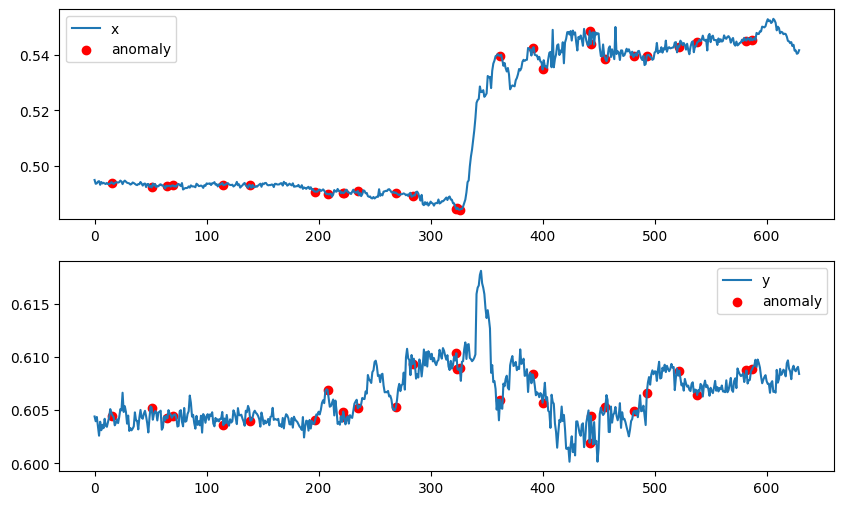

In [11]:
x_value = df[f'{part_name}_x'].values
y_value = df[f'{part_name}_y'].values

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(df.index, x_value, label='x')
ax[0].scatter(df.iloc[anomaly_indices].index, x_value[anomaly_indices], label='anomaly', c='r')
ax[0].legend()

ax[1].plot(df.index, y_value, label='y')
ax[1].scatter(df.iloc[anomaly_indices].index, y_value[anomaly_indices], label='anomaly', c='r')
ax[1].legend()
plt.show()

In [7]:
part_name = 'RIGHT_KNEE'
anomaly_indices = detect_anomalies_with_moving_avg_std_2d(df, part_name)

In [8]:
print(f'anomaly_indices: {anomaly_indices}')

anomaly_indices: [ 16  51  65  70 115 139 197 208 222 223 235 269 284 323 324 326 362 391
 400 442 443 456 482 493 522 538 582 587]


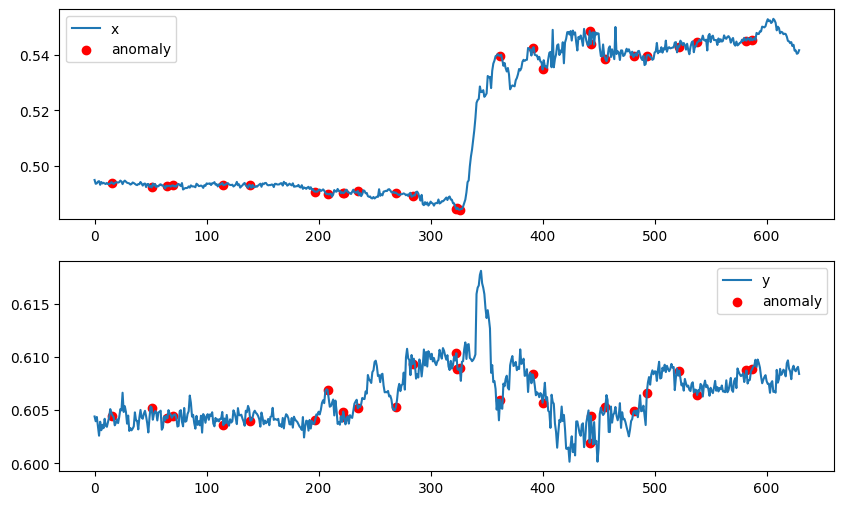

In [10]:
x_value = df[f'{part_name}_x'].values
y_value = df[f'{part_name}_y'].values

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(df.index, x_value, label='x')
ax[0].scatter(df.iloc[anomaly_indices].index, x_value[anomaly_indices], label='anomaly', c='r')
ax[0].legend()

ax[1].plot(df.index, y_value, label='y')
ax[1].scatter(df.iloc[anomaly_indices].index, y_value[anomaly_indices], label='anomaly', c='r')
ax[1].legend()
plt.show()